In [3]:
import os
# Specify the directory where the files were uploaded
upload_directory = './'  # Use the directory path where you uploaded the files
# List the files in the upload directory
uploaded_files = os.listdir(upload_directory)
# Print the list of uploaded files
print("Uploaded files:")
for file_name in uploaded_files:
    print(file_name)
    

Uploaded files:
.git
.ipynb_checkpoints
Friday-Afternoon-DDos.pcap.csv
Friday-Afternoon-PortScan.pcap.csv
Friday-Morning.pcap.csv
FYP final new.ipynb
IDS-using-Deep-Learning
img1.png
Monday-.pcap.csv
Thursday-Afternoon-Infilteration.pcap.csv
Thursday-Morning-WebAttacks.pcap.csv
Tuesday-WorkingHours.pcap.csv
Wednesday-workingHours.pcap.csv


In [1]:
import pandas as pd

C:\Users\muham\AppData\Local\Temp\ipykernel_1588\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
full_paths = []

# Iterate over the uploaded files
for file_name in uploaded_files:
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Construct the full path of the CSV file
        full_path = os.path.join(upload_directory, file_name)
        # Append the full path to the list
        full_paths.append(full_path)

# Initialize an empty DataFrame to store concatenated data
df = pd.DataFrame()

# Concatenate the CSV files into a single DataFrame
for file_path in full_paths:
    try:
        # Read the CSV file into a DataFrame
        df_temp = pd.read_csv(file_path)
        # Append the DataFrame to the main DataFrame
        df = pd.concat([df, df_temp], ignore_index=True)
    except pd.errors.EmptyDataError:
        print(f"Skipping empty file: {file_path}")

# Display the first few rows of the concatenated DataFrame
df.head()

Skipping empty file: ./Wednesday-workingHours.pcap.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df[' Label'].nunique()

10

In [30]:
df[' Label'].value_counts()

 Label
BENIGN                        1833066
PortScan                       158930
DDoS                           128027
FTP-Patator                      7938
SSH-Patator                      5897
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Name: count, dtype: int64

In [6]:
import numpy as np
from itertools import combinations
def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)

    num=df._get_numeric_data()
    num[num<0]=0

    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols, axis=1, inplace=True)
    print("Zero Variance Columns: ", zero_variance_cols, "are dropped.")
    print("Shape after removing the zero varaince columns: ",df.shape)

    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(),"rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)

    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)

    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)

Dataset Shape:  (2138040, 79)
Zero Variance Columns:  ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'] are dropped.
Shape after removing the zero varaince columns:  (2138040, 71)
1570 rows dropped
Shape after Removing NaN:  (2136470, 71)
Shape after dropping duplicates:  (1930315, 71)
Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Fwd PSH Flags', 'SYN Flag Count'), ('Fwd URG Flags', 'CWE Flag Count'), ('Fwd Header Length', 'Fwd Header Length.1')]  dropped!
Shape after removing identical value columns:  (1930315, 66)


In [32]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',

In [7]:
df['Label'].replace({
    'BENIGN': 'Benign',
    'DDoS': 'Distributed Denial of Service',
    'PortScan': 'Port Scanning',
    'FTP-Patator': 'FTP Brute Force',
    'SSH-Patator': 'SSH Brute Force',
    'Bot': 'Botnet Activity',
    'Web Attack � Brute Force': 'Web Brute Force',
    'Web Attack � XSS': 'Cross-Site Scripting (XSS)',
    'Infiltration': 'Network Infiltration',
    'Web Attack � Sql Injection': 'SQL Injection Attack'
},inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_1588\2636108018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Label'].replace({


In [34]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [8]:
# Select all rows where label is not 'Benign'
non_benign_subset = df[df['Label'] != 'Benign']

# Select the first 120,000 rows where label is 'Benign'
benign_subset = df[df['Label'] == 'Benign'].head(220000)

# Concatenate both subsets
final_subset = pd.concat([non_benign_subset, benign_subset])

In [9]:
final_subset['Label'].value_counts()

Label
Benign                           220000
Distributed Denial of Service    128014
Port Scanning                     90694
FTP Brute Force                    5931
SSH Brute Force                    3219
Botnet Activity                    1948
Web Brute Force                    1470
Cross-Site Scripting (XSS)          652
Network Infiltration                 36
SQL Injection Attack                 21
Name: count, dtype: int64

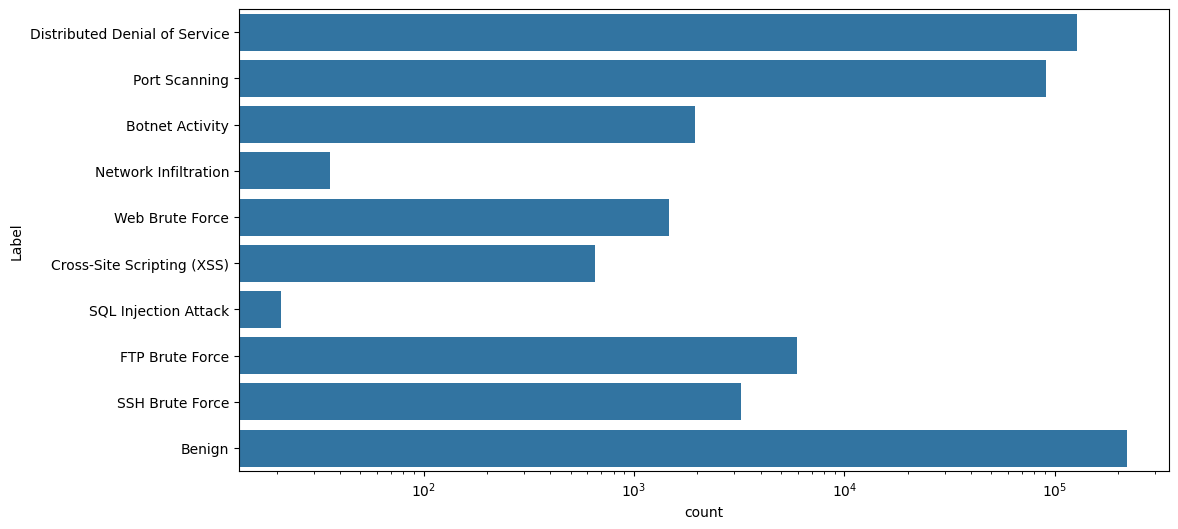

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plot = sns.countplot(final_subset, y='Label')
plt.xscale('log')
fig = plot.get_figure()
fig.savefig('img1.png')

In [10]:
final_subset.columns = final_subset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '', regex=False)
final_subset.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
18883,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Distributed Denial of Service
18884,80,4421382,4,0,24,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Distributed Denial of Service
18885,80,1083538,3,6,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Distributed Denial of Service
18886,80,80034360,8,4,56,11601,20,0,7.000000,5.656854,...,20,939.0,0.0,939,939,39300000.0,44200000.0,70600000,8072664,Distributed Denial of Service
18887,80,642654,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Distributed Denial of Service


In [42]:
final_subset.label.value_counts()

label
Benign                           220000
Distributed Denial of Service    128014
Port Scanning                     90694
FTP Brute Force                    5931
SSH Brute Force                    3219
Botnet Activity                    1948
Web Brute Force                    1470
Cross-Site Scripting (XSS)          652
Network Infiltration                 36
SQL Injection Attack                 21
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

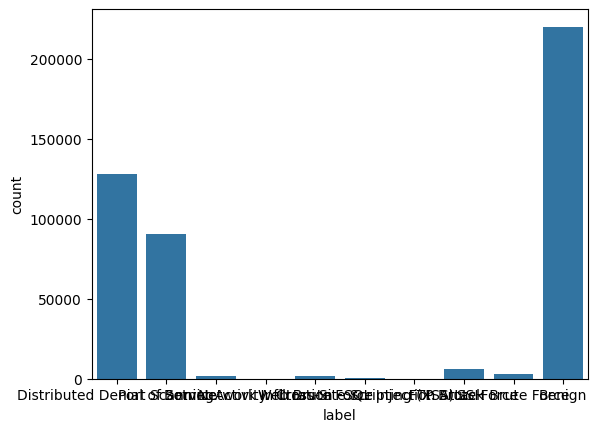

In [43]:
sns.countplot(data=final_subset,x=final_subset['label'])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X=final_subset.drop(columns='label')
y=final_subset['label']


In [36]:
y.value_counts()

label
Benign                           220000
Distributed Denial of Service    128014
Port Scanning                     90694
FTP Brute Force                    5931
SSH Brute Force                    3219
Botnet Activity                    1948
Web Brute Force                    1470
Cross-Site Scripting (XSS)          652
Network Infiltration                 36
SQL Injection Attack                 21
Name: count, dtype: int64

In [37]:
scaler=MinMaxScaler()

In [38]:
X=scaler.fit_transform(X)

In [39]:
with open("IDS_scaler.pkl", "wb") as file:
    # Serialize the object into the file
    pickle.dump(scaler, file)

In [13]:
# Initialize SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

In [15]:
y_train_resampled.value_counts()

label
Distributed Denial of Service    220000
Port Scanning                    220000
Botnet Activity                  220000
Network Infiltration             220000
Web Brute Force                  220000
Cross-Site Scripting (XSS)       220000
SQL Injection Attack             220000
FTP Brute Force                  220000
SSH Brute Force                  220000
Benign                           220000
Name: count, dtype: int64

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Concatenate
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [17]:
# Assuming you have loaded and preprocessed the dataset into X and y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Reshape input data for LSTM
sequence_length = 1  # Assuming each sample represents a sequence
input_dim = X_train.shape[1]  # Number of features

X_train_reshaped = X_train.reshape((X_train.shape[0], sequence_length, input_dim))
X_test_reshaped = X_test.reshape((X_test.shape[0], sequence_length, input_dim))

# Check the new shape
print("New shape of X_train:", X_train_reshaped.shape)
print("New shape of X_test:", X_test_reshaped.shape)

New shape of X_train: (361588, 1, 65)
New shape of X_test: (90397, 1, 65)


In [19]:
X_train_reshaped[0]

array([[8.08765183e-04, 1.75000074e-06, 1.81093807e-04, 3.61990950e-04,
        3.27970664e-05, 1.83177570e-05, 2.01198630e-03, 3.19293478e-02,
        7.91131631e-03, 0.00000000e+00, 8.39041096e-03, 6.71232877e-02,
        1.68950953e-02, 0.00000000e+00, 6.67126754e-04, 6.34920635e-03,
        5.93220339e-07, 1.35828377e-06, 1.69166667e-06, 2.54237288e-08,
        3.33333333e-08, 3.33333333e-08, 0.00000000e+00, 3.33333333e-08,
        3.33333333e-08, 2.50000000e-08, 2.50000000e-08, 0.00000000e+00,
        2.50000000e-08, 2.50000000e-08, 0.00000000e+00, 0.00000000e+00,
        5.79332320e-04, 5.79122629e-04, 3.17460317e-03, 4.76190476e-03,
        3.53383459e-02, 4.19520548e-03, 3.47990707e-02, 5.90377644e-03,
        3.48348214e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.06451613e-03,
        3.33267405e-02, 7.91131631e-03, 1.68950953e-02, 3.27970664e-05,
        1.83506183e-05, 0.00000000e+00, 0.00000000e+00, 1.810938

In [20]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

In [21]:
num_classes

10

In [22]:
label_encoder.classes_

array(['Benign', 'Botnet Activity', 'Cross-Site Scripting (XSS)',
       'Distributed Denial of Service', 'FTP Brute Force',
       'Network Infiltration', 'Port Scanning', 'SQL Injection Attack',
       'SSH Brute Force', 'Web Brute Force'], dtype=object)

In [24]:
import pickle
with open("IDS_label_encoder.pkl", "wb") as file:
    # Serialize the object into the file
    pickle.dump(label_encoder, file)


In [25]:
# Reshape input data for CNN
input_shape_cnn = (X_train.shape[1], 1)  # Assuming each sample has 65 features, reshape to (65, 1)
input_shape_lstm = (1, X_train.shape[1])  # Reshape for LSTM input

# Define the CNN branch
input_cnn = Input(shape=input_shape_cnn)
conv1 = Conv1D(32, kernel_size=3, activation='relu')(input_cnn)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)
flatten_cnn = Flatten()(pool2)

# Define the LSTM branch
input_lstm = Input(shape=input_shape_lstm)
lstm1 = LSTM(64, return_sequences=True)(input_lstm)
lstm2 = LSTM(32)(lstm1)
flatten_lstm = Flatten()(lstm2)

# Concatenate the outputs of CNN and LSTM branches
concatenated = Concatenate()([flatten_cnn, flatten_lstm])

# Fully connected layers for classification
dense1 = Dense(128, activation='relu')(concatenated)
dropout = Dropout(0.5)(dense1)
output = Dense(num_classes, activation='softmax')(dropout)

# Create the hybrid model
model = Model(inputs=[input_cnn, input_lstm], outputs=output)

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 65, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 63, 32)    │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 31, 32)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1, 65)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 29, 64)    │      6,208 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 1, 64)     │     33,280 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 14, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 896)       │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 928)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    118,912 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      1,290 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 172,234 (672.79 KB)

 Trainable params: 172,234 (672.79 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with verbose output and early stopping
history = model.fit([X_train, X_train_reshaped], y_train_encoded, epochs=50, batch_size=64, 
                    validation_split=0.1, verbose=1, callbacks=[early_stopping])


Epoch 1/50
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - accuracy: 0.9437 - loss: 0.2014 - val_accuracy: 0.9850 - val_loss: 0.0453
Epoch 2/50
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 60s 12ms/step - accuracy: 0.9850 - loss: 0.0488 - val_accuracy: 0.9860 - val_loss: 0.0419
Epoch 3/50
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 58s 11ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9921 - val_loss: 0.0288
Epoch 4/50
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9903 - val_loss: 0.0258
Epoch 5/50
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9904 - loss: 0.0290 - val_accuracy: 0.9919 - val_loss: 0.0230
Epoch 6/50
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 66s 13ms/step - accuracy: 0.9910 - loss: 0.0264 - val_accuracy: 0.9929 - val_loss: 0.0220
Epoch 7/50
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 66s 13ms/step - accuracy: 0.9911 - loss: 0.0253 - val_accuracy: 0.9908 - val_loss: 0.0225
Epoch 8/50
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 70s 14ms/step - accuracy: 0.9918 -

In [27]:
test_loss, test_accuracy = model.evaluate([X_test, X_test_reshaped], y_test_encoded)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2825/2825 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9951 - loss: 0.0146
Test Loss: 0.013999491930007935
Test Accuracy: 0.9948117733001709


In [28]:
# Save the entire model in the native Keras format
model.save("IDS_hybrid_model.h5")  # This will create a file named "hybrid_model" containing the model architecture, weights, and optimizer state

In [29]:
# Save the entire model in the native Keras format
model.save("IDS_hybrid_model.keras")  # This will create a file named "hybrid_model" containing the model architecture, weights, and optimizer state

In [30]:
# Save only the weights
model.save_weights("IDS_Weights_hybrid_model.weights.h5")

In [31]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("IDS_hybrid_model.keras")

c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [32]:
with open("IDS_label_encoder.pkl", "rb") as file:
    # Serialize the object into the file
    encoder= pickle.load(file)

In [33]:
import numpy as np

# Assuming X_new is the new data point you want to predict
X_new = X_train[35]

# Reshape X_new if necessary
X_new_reshaped = X_train_reshaped[35]

# Add an extra dimension to match the model's input shape
X_new = np.expand_dims(X_new, axis=0)
X_new_reshaped = np.expand_dims(X_new_reshaped, axis=0)

# Make predictions
predictions = model.predict([X_new, X_new_reshaped])

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
Predicted class: [3]


In [34]:
label_encoder .inverse_transform(predicted_class)

array(['Distributed Denial of Service'], dtype=object)